In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import lambertw
from numpy import exp, log, e
%matplotlib inline

# Fitting

### Fitting with Curve_fit

In [8]:
from scipy.optimize import curve_fit


def model_func(t, *p):
    
    def lambertDecay(t, *p):
        sigma_21 = 1
        tau = 10
#         n20 = 0.8
        alpha, n20 = p
        arg = -alpha*sigma_21*n20*exp(-(t+alpha*sigma_21*n20*tau)/tau)
        return -lambertw(arg)/(alpha*sigma_21)

    n = lambertDecay(t, *p)
    
    return n.real

# Guess for dependent data
p0 = [alpha, n20]

# Fit data to model using Levenberg-Marquardt algorithm
popt, pcov = curve_fit(model_func, t, data, p0=p0, method='lm')
# 'trf' can take bounds.
# popt, pcov = curve_fit(model_func, t, data, p0=p0, bounds=[(0,None),(0.5,1)], method='trf')

plt.figure()
plt.semilogy(t,n, '--', label='Theoretical')

# Add 1% noise to theoretical fit to create data
data = n + np.random.normal(0, 0.01, np.size(n))
plt.semilogy(t,data, '.', label='Noised Data')

# Fit model
plt.plot(t, model_func(t, *popt), 'r-', label="Fitted Curve")

plt.axhline(1/np.e, ls='--', color='k')
plt.legend(loc='best', title='alpha')
plt.ylabel('$n_2$/max($n_2$)')
plt.xlabel('time (ms)')

popt, p0

NameError: name 'data' is not defined

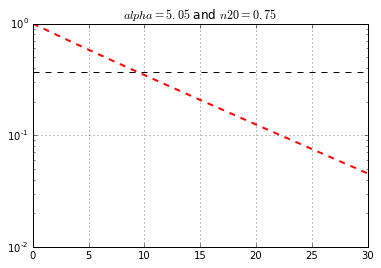

In [7]:
from ipywidgets import interact

def plt_arrays(x, y, title="", color="red", linestyle="dashed", linewidth=2):
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.plot(x,y, color=color, linestyle=linestyle, linewidth=linewidth)
    axes.set_title(title)
    axes.grid()
    plt.axhline(1/np.e, ls='--', color='k')
    plt.xlim(min(t),max(t))
    plt.yscale('log')
    plt.show()
    
def f(alpha, n20, **kwargs):
    t = np.linspace(0,30,500)
    tau = 10
    sigma_21 = 1
    n = lambertDecay(t, alpha, tau, sigma_21, n20)
    
    title="$alpha = %s$ and $n20 = %s$" % (alpha,n20)
    
    plt_arrays(t,n/max(n), title=title, **kwargs)
    
#Define Constants
alpha=0.25
n20=0.7

f(alpha, n20)

i = interact(f,
             alpha=(0.1,10.),
             n20=(0.5,1),
#              color = ["red", "blue", "green"],
#              linestyle=["solid", "dashed"],
#              linewidth=(1,5)
             )